``
Record Length,2.500000e+03,,  -0.000250000000,-2520.00000,
Sample Interval,4.000000e-07,,  -0.000249600000,-2560.00000,
Trigger Point,6.250000000000e+02,,  -0.000249200000,-2560.00000,
,,,  -0.000248800000,-2520.00000,
,,,  -0.000248400000,-2560.00000,
,,,  -0.000248000000,-2520.00000,
Source,CH1,,  -0.000247600000,-2520.00000,
Vertical Units,V,,  -0.000247200000,-2520.00000,
Vertical Scale,1.000000e+03,,  -0.000246800000,-2560.00000,
Vertical Offset,0.000000e+00,,  -0.000246400000,-2560.00000,
Horizontal Units,s,,  -0.000246000000,-2560.00000,
Horizontal Scale,1.000000e-04,,  -0.000245600000,-2560.00000,
Pt Fmt,Y,,  -0.000245200000,-2560.00000,
Yzero,0.000000e+00,,  -0.000244800000,-2520.00000,
Probe Atten,5.000000e+02,,  -0.000244400000,-2520.00000,
Model Number,TBS1202B-EDU,,  -0.000244000000,-2560.00000,
Serial Number,C030451,,  -0.000243600000,-2480.00000,
Firmware Version,FV:v4.06,,  -0.000243200000,-2600.00000,
``

In [1]:
import pandas as pd

df = pd.read_csv('Data/ALL0016/step_func.CSV', header=None)
df = pd.DataFrame([df[3], df[4]]).T
df.head()

,3,4
0,-0.000243,-2520.0
1,-0.000242,-2560.0
2,-0.000242,-2600.0
3,-0.000242,-2560.0
4,-0.000241,-2520.0


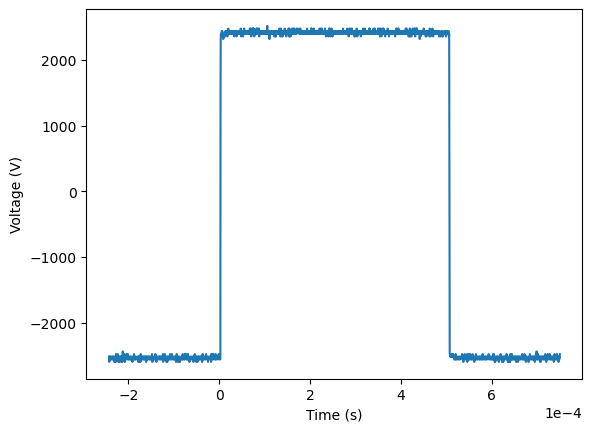

In [2]:
import matplotlib.pyplot as plt

plt.plot(df[3], df[4])
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

<img src='Data/ALL0016/F0016TEK.BMP'>

Text(0.5, 0, 'Frequency (Hz)')

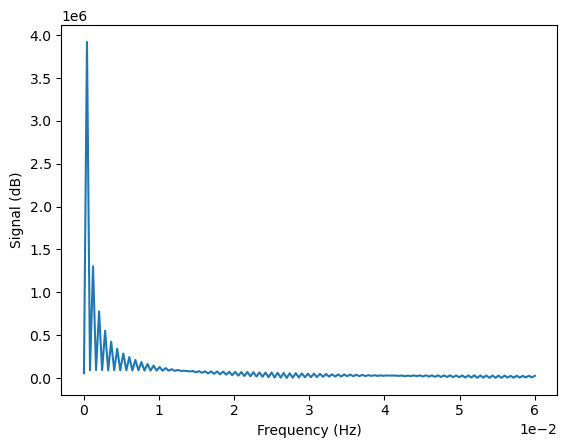

In [10]:
import numpy as np

sp = np.fft.fft(df[4])
freq = np.fft.fftfreq(len(df[3]))

plt.plot(freq[:150], np.abs(sp[:150]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('Signal (dB)')
plt.xlabel('Frequency (Hz)')

<img src='Data/ALL0047/F0047TEK.BMP'>

Look at [this](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#The_Plancherel_theorem_and_Parseval's_theorem)! We get the equality for Discrete Fourier Transform!

In [4]:
np.sum(np.abs(df[4])**2)

15268425600.0

In [5]:
(1/len(sp))*np.sum(np.abs(sp)**2)

15268425600.0

Two uncertainty principles for Discrete Fourier Transform (look at the [Wikipedia entry](https://en.wikipedia.org/wiki/Uncertainty_principle#Discrete_Fourier_transform))

* First one requires that the absolute square of the original signal be normalized (How to do this?)
* Second one takes the product of non-zero entries

In [6]:
# Probability mass function
pmf = np.histogram(df[4])[0]/len(df[4])
N = np.sum(np.abs(pmf)**2)
# P_n supposed to be the random variable of
# the Wikipedia entry s.t. sum(P_n)=1
P_n = pmf / np.sqrt(N)
np.sum(P_n**2)

0.9999999999999998

In [19]:
# Get number of non-zero entries in signal
nonzero_signal = len(np.nonzero(df[4].values)[0])
# Do the same for the FFT
nonzero_FFT = len(np.nonzero(np.abs(sp))[0])

In [20]:
# Check inequality
N = len(df[4])
nonzero_FFT * nonzero_signal

6160324

In [21]:
N

2482